In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import koreanize_matplotlib
import matplotlib.pyplot as plt

범례를 보면 어떤 수준으로 그린 그래프인지 알 수 있음    
axes level(범례가 안에 들어가 있음), figure level(범례가 바깥쪽에 붙어있음) 

Seaborn의 베이스는 matplotlib이므로, 한글 폰트 설정은 matplotlib의 설정을 따름.     
- import koreanized_matplot lib을 통해 한글 폰트를 설정할 수 있음.      
- 단, 테마나 스타일 변경을 하면, 한글 폰트 설정이 초기화되므로 다시 설정해야 함.
    - plt.rc('font', family='Malgun Gothic')


전체 테마 설정
- sns.set_theme() 함수를 사용하여 전체 테마를 설정할 수 있음.
- 테마 스타일: darkgrid, whitegrid, dark, white, ticks 등이 있음.

***pandas의 range와 numpy의 arange***

In [2]:
print(type(range(10)))

<class 'range'>


In [3]:
range(10)

range(0, 10)

In [4]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

range는 range 객체, 시작, 끝 3개만 가지고 있지만 arange는 범위 안 모든 숫자를 들고 있다.

In [5]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

list로 감싸주면 값을 가지게 된다

In [6]:
print(list(range(0,10,2)))
print(np.arange(0,10,2))

[0, 2, 4, 6, 8]
[0 2 4 6 8]


In [7]:
# print(list(range(0,10,1.2))) >오류남. 정수만 건너뛰기 가능
np.arange(0,10,1.2)#실수배 건너뛰기 가능

array([0. , 1.2, 2.4, 3.6, 4.8, 6. , 7.2, 8.4, 9.6])

In [8]:
plt.rcParams['figure.figsize']=(12,5)

# 20행 6열의 정규분포를 따르는 랜덤 데이터 생성하고 (0~5)/2를 오프셋으로 추가
data = np.random.normal(size=(20, 6)) + np.arange(6)/2 #값을 직접 가지고 있게 할 때 arange사용
#20행 6열로 값을 만든 후 1행 6열짜리를 더하라 하면 연산 시 사이즈가 맞지 않기 때문에 
#broadcasting해서 연산함
#broadcasting : 골고루 뿌려주는 것, 모든 행에 더해줌

#np.array+np.array를 했기 때문에 df로 변환해줌
df=pd.DataFrame(data, columns=[f'X{i}' for i in range(1,7)])#list comprehension 사ㅏ용
df.head()

,X1,X2,X3,X4,X5,X6
0,0.400395,1.440150,2.607561,2.060837,1.930902,4.885630
1,0.815703,-0.663158,2.199800,2.611041,2.397354,1.954859
2,-0.451132,0.251287,1.340032,1.980133,0.920138,1.387408
3,-0.995726,-1.297189,0.355460,2.455055,0.448537,2.739097
4,0.031403,0.451521,1.794263,0.454930,2.618953,1.390684


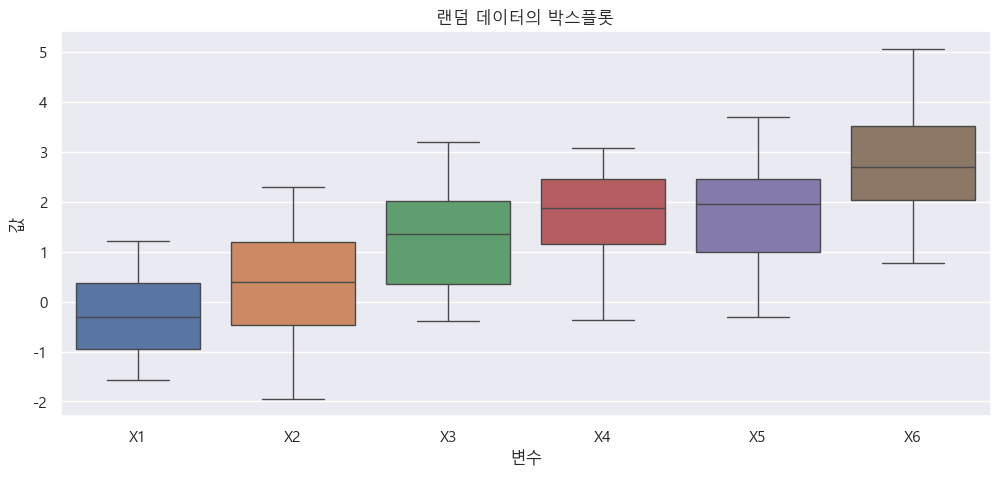

In [9]:
#테마를 설정
sns.set_theme(style="darkgrid")
#한글폰트 지정
plt.rc('font',family='Malgun Gothic')

#figure 생성
plt.figure()

#박스플롯 그리기
sns.boxplot(df)

plt.title("랜덤 데이터의 박스플롯")
plt.xlabel("변수")
plt.ylabel("값")
plt.show()

In [10]:
#토이 데이터 세트 불러오기
tips=sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


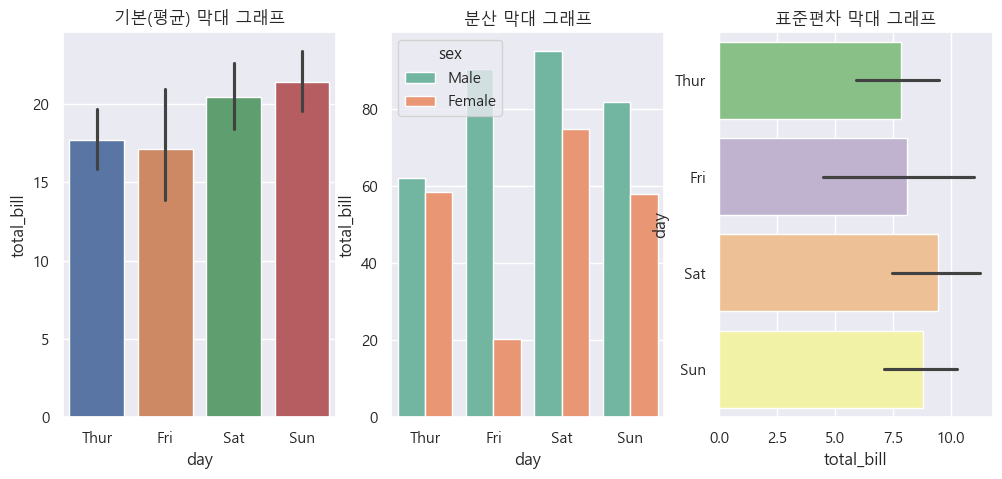

In [11]:
fig,ax=plt.subplots(1,3,figsize=(12,5))
sns.barplot(
    ax=ax[0],
    data=tips,
    x='day',
    y='total_bill',
    hue='day'
    )
ax[0].set_title('기본(평균) 막대 그래프')
 #분산을 나타내는 막대 그래프
sns.barplot(
ax=ax[1], #두 번째 subplot에 그래프를 그리기
data=tips, # 데이터프레임
x="day", #x축 변수
y="total_bill", # y축 변수
hue="sex", #범주형 변수로 색상 구분
estimator=np.var, #분산을 계산하여 y값으로 사용
errorbar=None, #신뢰구간을 95%로 설정
palette="Set2" 
)
ax[1].set_title('분산 막대 그래프')


sns.barplot(
ax=ax[2], #세 번째 subplot에 그래프를 그리기
data=tips, # 데이터프레임
x="total_bill", # x축 변수
y="day", #y축 변수
hue="day", #범주형 변수로 색상 구분
estimator=np.std, #표준편차를 계산하여 x값으로 사용
errorbar=("ci", 95), #신뢰구간을 95%로 설정
orient="h", #수평 방향으로 그래프 그리기
palette="Accent" #색상 팔레트 설정
)
ax[2].set_title("표준편차 막대 그래프")
plt.show()

히스토그램은 데이터의 분포를 시각적으로 표현하는 데에 유용.     
히스토그램은 단순히 분포의 모양을 시각적으로 확인하는 도구로만 사용해야 함. 분포를 결정하는 것은 적합성 검정(goodnes of fit test)과 같은 통계적 방법으로 수행함     
히스토그램의 구간(bin) 수는 막대가 부드럽게 연결되는 형태가 만들어 졌을 때가 가장 적절한 구간의 수

상관계수는 선형 관계인 경우에만 유효하기 때문에 비선형 관계를 확인하기 위해서 페어플롯 등을 활용할 수 있다.

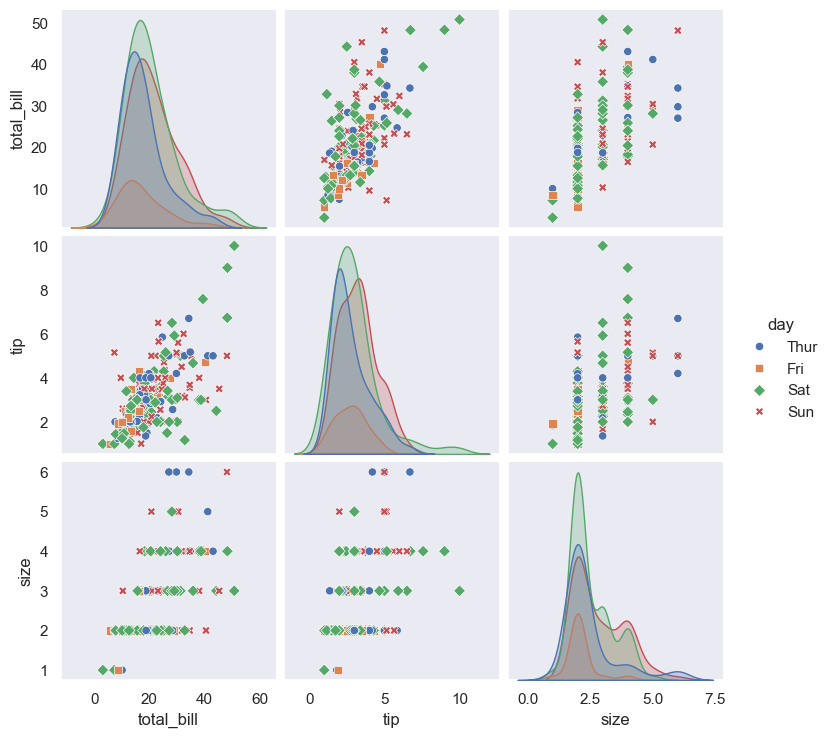

In [12]:
#페어 플롯(산점도 행렬)
sns.set_style("dark")
sns.pairplot(
data=tips, # 데이터프레임
kind="scatter", # 산점도
hue="day", #색상변경 기준 변수
diag_kind="kde", # 대각선에 커널 밀도 추정선 표시
markers=["o", "s", "D", "X"], # 마커 스타일 설정
);

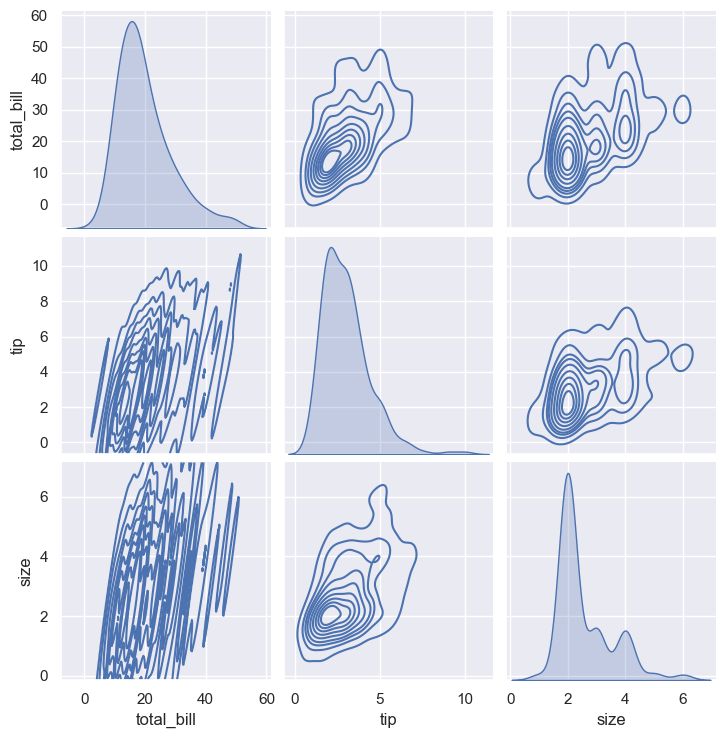

In [13]:
#페어 플롯(산점도 행렬)
sns.set_style("darkgrid")
sns.pairplot(
data=tips, # 데이터프레임
kind="kde", # kde
);

Facet 그래프 
- matplotlib 에는 facet 기능이 없음
- seaborn에서 사용 가능

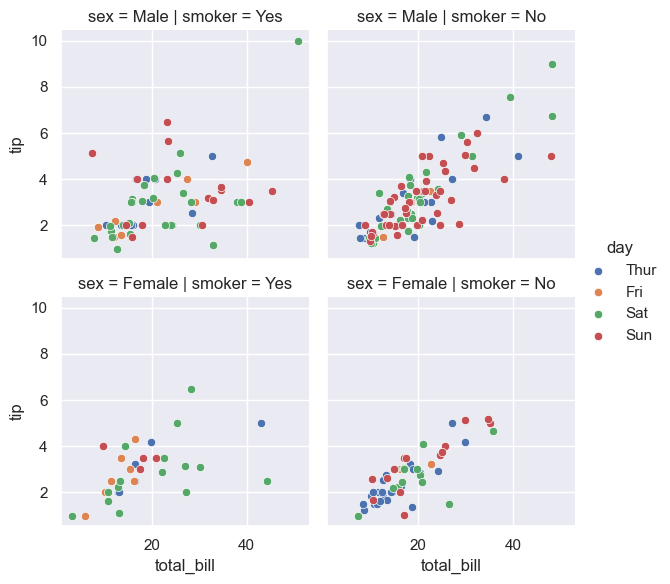

In [14]:
sns.FacetGrid(
data=tips, # 데이터프레임
row="sex", #행은 sex 열을 기준으로 서브플롯 생성
col="smoker", #열은 smoker 열을 기준으로 서브플롯 생성
hue="day", #색상변경 기준 변수
height=3, #각 서브플롯의 높이 설정
aspect=1 # 서브플롯의 가로 세로 비율을 동일하게 설정
).map_dataframe(
    sns.scatterplot, # 서브플롯에 산점도 그리기
    x='total_bill',
    y='tip'
).add_legend() #범례 보고 facet 사용했는지 axes로 그렸는지 확인 가능

plt.show()

In [15]:
df=pd.read_csv(
    './data/통합데이터.csv', encoding='utf-8',index_col='구별')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 중랑구 to 강남구
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CCTV 수량   25 non-null     int64  
 1   인구수       25 non-null     int64  
 2   범죄발생      25 non-null     int64  
 3   범죄검거      25 non-null     int64  
 4   cctv비율    25 non-null     float64
 5   인구비율      25 non-null     float64
 6   검거율       25 non-null     float64
 7   cctv인구비율  25 non-null     float64
dtypes: float64(4), int64(4)
memory usage: 1.8+ KB


추정
- 모집단의 일부 데이터를 샘플링해서 관측, 측정.
아는 것은 표본이고 이걸 토대로 모집단을 설명하는 것이 추정임

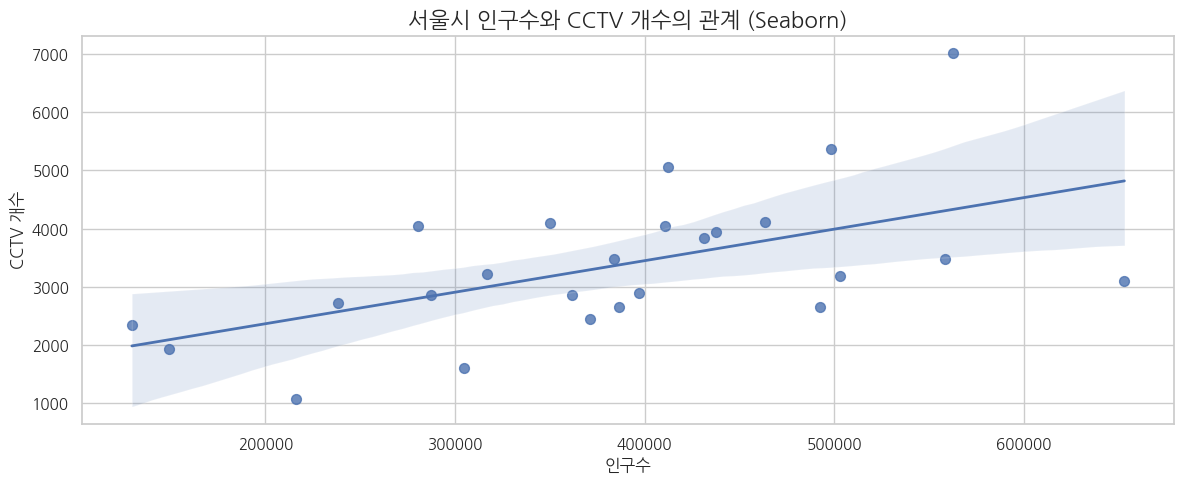

In [ ]:
import pandas as pd
import seaborn as sns
import koreanize_matplotlib  
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm, rcParams
# 3) 시각화 스타일
sns.set_theme(style="whitegrid") 
plt.figure(figsize=(12, 5))

#sns.set_theme()를 먼저 호출하고, 그 다음에 폰트 rc를 설정하세요. (일부 스타일이 rc를 덮는 경우가 있어 순서가 중요합니다.)

font_path = r"..\NanumFontSetup_TTF_GOTHIC\NanumGothic.ttf"  # 예: 프로젝트 내 폰트 파일
fm.fontManager.addfont(font_path)
name = fm.FontProperties(fname=font_path).get_name()
rcParams['font.family'] = name
rcParams['font.sans-serif'] = [name]
rcParams['axes.unicode_minus'] = False


# 4) 회귀선 + 산점도
sns.regplot(
    data=df,
    x="인구수",               # 공백 제거된 컬럼명 사용
    y="CCTV 수량",
    scatter_kws={"s": 50, "alpha": 0.8},
    line_kws={"linewidth": 2},
    ci=95                     # 신뢰구간(원하시면 None로 끌 수 있음)
)

# 5) 제목/레이블/그리드
plt.title("서울시 인구수와 CCTV 개수의 관계 (Seaborn)", fontsize=16)
plt.xlabel("인구수")
plt.ylabel("CCTV 개수")
plt.grid(True)

plt.tight_layout()
plt.show()


반투명한 음영 밴드는 sns.regplot(..., ci=95)가 그려주는 회귀선의 95% 신뢰구간(Confidence Interval) 입니다.

의미

각 x 지점에서 “모형이 추정한 모집단 평균값(회귀선)”의 불확실성 범위를 나타냅니다.

즉, 같은 분포에서 무한히 표본을 뽑아 회귀선을 다시 그렸을 때, 그 회귀선이 95% 확률로 들어갈 범위라고 이해하시면 됩니다.

이는 개별 데이터 점이 떨어질 범위(=예측구간, Prediction Interval)가 아닙니다. 예측구간은 보통 신뢰구간보다 더 넓게 나옵니다.

왜 양끝이 더 넓어 보이나요?

데이터가 **드문 영역(엣지)**에선 추정 불확실성이 커져 밴드가 넓어지고,

데이터가 조밀하고 분산이 작은 구간에선 더 좁아집니다.

히트맵 그릴 때 범위를 보고 1, -1이 아니라 1, -0.5 범위인 경우 음수쪽 색이 과도하게 표시될 수 있음